# Clasificaciones usando muestra de tamaño 20000

In [1]:
import pickle

import numpy as np

import pandas as pd

% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

import joblib

from libs.container import Container
from libs.display import d
from libs.experiment import KFoldExperiment, WithAnotherExperiment, roc

In [2]:
cpu = joblib.cpu_count()

In [3]:
sample = pd.read_pickle("data/ogle3_only/scaled/s20k.pkl.bz2")
sample["tile"] = sample["id"].apply(lambda i: "b" + str(i)[1:4])
sample["cls"] = sample.vs_type.apply(lambda x: 0 if x == "" else 1)

In [4]:
no_features = ["id", "vs_catalog", "vs_type", "ra_k", "dec_k", "tile", "cls"] 
X_columns = [c for c in sample.columns if c not in no_features]

grouped = sample.groupby("tile")
data = Container({k: grouped.get_group(k).copy() for k in grouped.groups.keys()})

del grouped, sample

## Features

In [5]:
cls = {0:0, 1:1}

In [6]:
d(X_columns)

1. cnt
2. Amplitude
3. Autocor_length
4. Beyond1Std
5. CAR_mean
6. CAR_sigma
7. CAR_tau
8. Con
9. Eta_e
10. FluxPercentileRatioMid20
11. FluxPercentileRatioMid35
12. FluxPercentileRatioMid50
13. FluxPercentileRatioMid65
14. FluxPercentileRatioMid80
15. Freq1_harmonics_amplitude_0
16. Freq1_harmonics_amplitude_1
17. Freq1_harmonics_amplitude_2
18. Freq1_harmonics_amplitude_3
19. Freq1_harmonics_rel_phase_0
20. Freq1_harmonics_rel_phase_1
21. Freq1_harmonics_rel_phase_2
22. Freq1_harmonics_rel_phase_3
23. LinearTrend
24. MaxSlope
25. Mean
26. Meanvariance
27. MedianAbsDev
28. MedianBRP
29. PairSlopeTrend
30. PercentAmplitude
31. PercentDifferenceFluxPercentile
32. PeriodLS
33. Period_fit
34. Psi_CS
35. Psi_eta
36. Q31
37. Rcs
38. Skew
39. SmallKurtosis
40. Std
41. c89_jk_color
42. c89_hk_color
43. c89_jh_color
44. n09_jk_color
45. n09_hk_color
46. n09_jh_color
47. c89_m2
48. c89_m4
49. c89_c3
50. n09_m2
51. n09_m4
52. n09_c3
53. AmplitudeH
54. AmplitudeJ
55. ppmb
56. AmplitudeJH
57. AmplitudeJK

## b278 - K-Folds

In [7]:
%%time
svc_linear = KFoldExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
svc_linear = svc_linear("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99     19931
        1.0       0.91      0.43      0.59       423

avg / total       0.99      0.99      0.99     20354

--------------------------------------------------------------------------------
CPU times: user 7min 17s, sys: 3.06 s, total: 7min 20s
Wall time: 7min 20s


In [8]:
%%time
svc_poly = KFoldExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
svc_poly = svc_poly("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99     19931
        1.0       0.86      0.41      0.56       423

avg / total       0.98      0.99      0.98     20354

--------------------------------------------------------------------------------
CPU times: user 4min 47s, sys: 2.22 s, total: 4min 49s
Wall time: 4min 49s


In [9]:
%%time
svc_rbf = KFoldExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls,
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
svc_rbf = svc_rbf("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99     19931
        1.0       0.95      0.43      0.59       423

avg / total       0.99      0.99      0.99     20354

--------------------------------------------------------------------------------
CPU times: user 5min 24s, sys: 2.25 s, total: 5min 26s
Wall time: 5min 26s


In [10]:
%%time
rf = KFoldExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy", n_jobs=cpu), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
rf = rf("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00     19931
        1.0       0.93      0.65      0.76       423

avg / total       0.99      0.99      0.99     20354

--------------------------------------------------------------------------------
CPU times: user 15min 21s, sys: 10.3 s, total: 15min 32s
Wall time: 53.8 s


In [11]:
%%time
knn = KFoldExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
knn = knn("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99     19931
        1.0       0.87      0.33      0.48       423

avg / total       0.98      0.99      0.98     20354

--------------------------------------------------------------------------------
CPU times: user 5min 47s, sys: 7 ms, total: 5min 47s
Wall time: 5min 47s


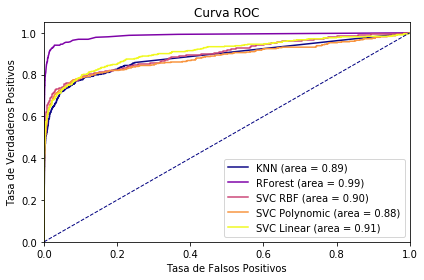

In [12]:
roc({"KNN": knn, "RForest": rf, 
     "SVC RBF": svc_rbf, 
     "SVC Linear": svc_linear,
     "SVC Polynomic": svc_poly})

## b278 vs. Los demas

b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19972
          1       0.85      0.57      0.68       221

avg / total       0.99      0.99      0.99     20193

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.91      0.56      0.70       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.86      0.52      0.65       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

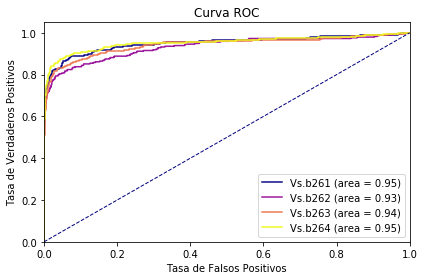

CPU times: user 4min 1s, sys: 1.32 s, total: 4min 2s
Wall time: 4min 3s


In [13]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear("b278"))

b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19972
          1       0.76      0.54      0.63       221

avg / total       0.99      0.99      0.99     20193

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.83      0.52      0.64       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     19988
          1       0.76      0.49      0.59       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

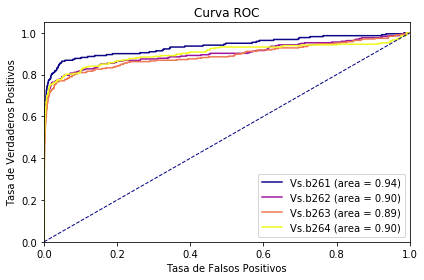

CPU times: user 2min 27s, sys: 745 ms, total: 2min 28s
Wall time: 2min 28s


In [14]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly("b278"))

b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19972
          1       0.93      0.57      0.70       221

avg / total       0.99      0.99      0.99     20193

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.93      0.53      0.68       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.89      0.50      0.64       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

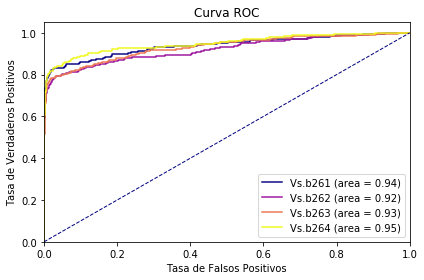

CPU times: user 2min 50s, sys: 672 ms, total: 2min 51s
Wall time: 2min 51s


In [15]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf("b278"))

b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19972
          1       0.96      0.74      0.84       221

avg / total       1.00      1.00      1.00     20193

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19951
          1       0.97      0.67      0.79       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.92      0.67      0.77       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

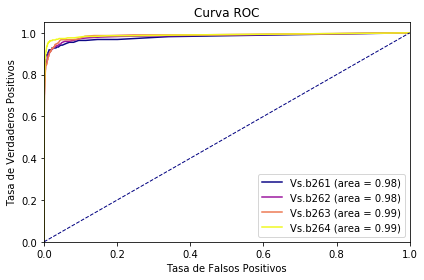

CPU times: user 6min 52s, sys: 4.34 s, total: 6min 56s
Wall time: 23.4 s


In [16]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy", n_jobs=cpu), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf("b278"))

b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19972
          1       0.78      0.50      0.61       221

avg / total       0.99      0.99      0.99     20193

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.83      0.43      0.57       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     19988
          1       0.80      0.41      0.54       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b264 (TE

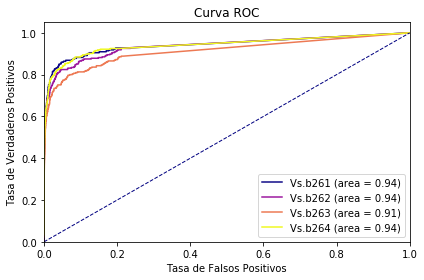

CPU times: user 19min 50s, sys: 83 ms, total: 19min 50s
Wall time: 19min 50s


In [17]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn("b278"))

## b261 vs. Los demas

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.92      0.56      0.69       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.84      0.53      0.65       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19995
          1       0.88      0.57      0.69       294

avg / total       0.99      0.99      0.99     20289

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TE

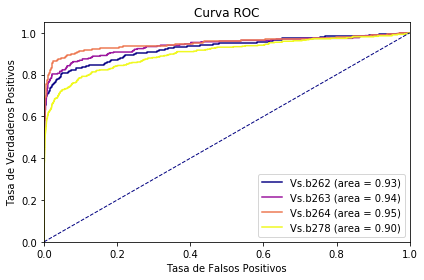

CPU times: user 2min 1s, sys: 358 ms, total: 2min 1s
Wall time: 2min 1s


In [18]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.95      0.47      0.62       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.89      0.47      0.61       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19995
          1       0.90      0.48      0.63       294

avg / total       0.99      0.99      0.99     20289

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TE

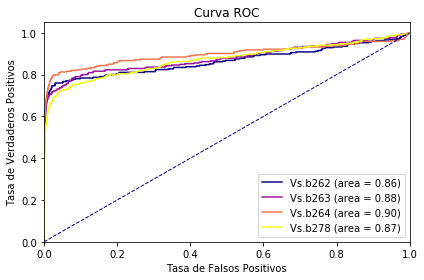

CPU times: user 1min 28s, sys: 285 ms, total: 1min 29s
Wall time: 1min 29s


In [19]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.95      0.50      0.66       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.90      0.49      0.63       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19995
          1       0.96      0.54      0.69       294

avg / total       0.99      0.99      0.99     20289

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TE

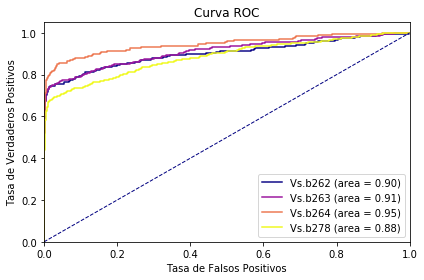

CPU times: user 1min 36s, sys: 266 ms, total: 1min 36s
Wall time: 1min 36s


In [20]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.98      0.63      0.77       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.96      0.64      0.77       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19995
          1       0.96      0.69      0.80       294

avg / total       0.99      1.00      0.99     20289

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TE

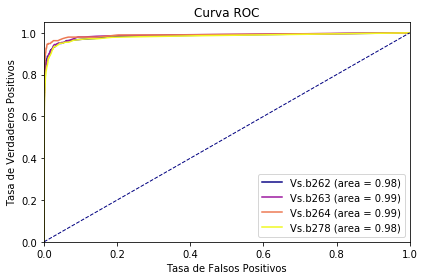

CPU times: user 6min 25s, sys: 4.14 s, total: 6min 29s
Wall time: 22.5 s


In [21]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy", n_jobs=cpu), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf("b261"))

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.94      0.39      0.55       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     19988
          1       0.90      0.38      0.53       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19995
          1       0.93      0.43      0.58       294

avg / total       0.99      0.99      0.99     20289

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TE

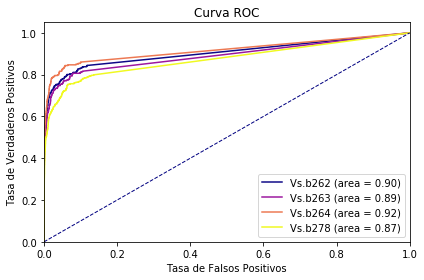

CPU times: user 25min 33s, sys: 73 ms, total: 25min 34s
Wall time: 25min 34s


In [22]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn("b261"))

## b278 + b261 vs. Los demas

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.94      0.55      0.69       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.87      0.52      0.65       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19995
          1       0.91      0.56      0.70       294

avg / total       0.99      0.99      0.99     20289

--------------------------------------------------------------------------------


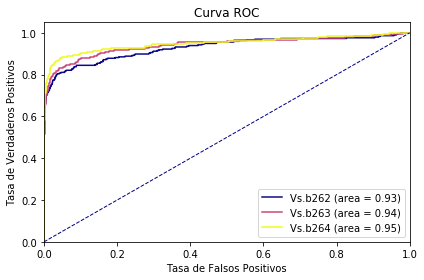

CPU times: user 7min 42s, sys: 2.6 s, total: 7min 45s
Wall time: 7min 45s


In [23]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.88      0.52      0.65       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.82      0.49      0.61       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19995
          1       0.89      0.53      0.67       294

avg / total       0.99      0.99      0.99     20289

--------------------------------------------------------------------------------


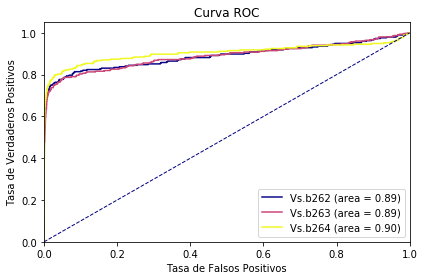

CPU times: user 4min 29s, sys: 1.77 s, total: 4min 31s
Wall time: 4min 31s


In [24]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.95      0.54      0.69       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.91      0.51      0.65       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19995
          1       0.96      0.56      0.71       294

avg / total       0.99      0.99      0.99     20289

--------------------------------------------------------------------------------


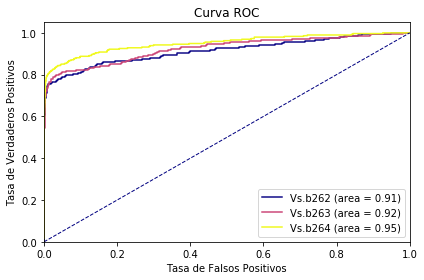

CPU times: user 4min 53s, sys: 1.65 s, total: 4min 55s
Wall time: 4min 55s


In [25]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19951
          1       0.97      0.69      0.80       296

avg / total       1.00      1.00      0.99     20247

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19988
          1       0.93      0.70      0.80       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19995
          1       0.94      0.74      0.83       294

avg / total       1.00      1.00      1.00     20289

--------------------------------------------------------------------------------


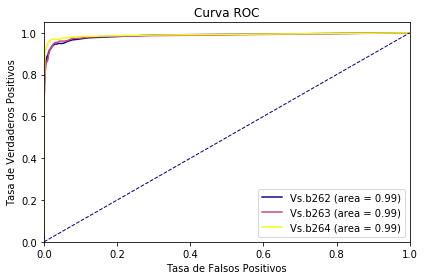

CPU times: user 11min 15s, sys: 4.58 s, total: 11min 19s
Wall time: 25.6 s


In [26]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy", n_jobs=cpu), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf(["b278", "b261"]))

b278 + b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.89      0.45      0.60       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.85      0.43      0.57       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------
b278 + b261 (TRAIN) Vs. b264 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19995
          1       0.88      0.48      0.62       294

avg / total       0.99      0.99      0.99     20289

--------------------------------------------------------------------------------


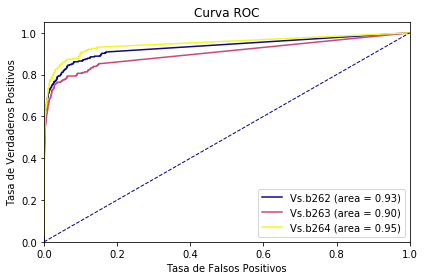

CPU times: user 39min 34s, sys: 45 ms, total: 39min 34s
Wall time: 39min 35s


In [29]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn(["b278", "b261"]))

## b278 + b261 + b264 vs. Los demas

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.94      0.56      0.70       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.87      0.53      0.66       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------


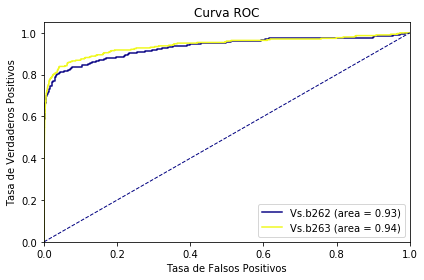

CPU times: user 17min 43s, sys: 1.76 s, total: 17min 45s
Wall time: 17min 45s


In [30]:
%%time
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_linear(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.89      0.54      0.67       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.86      0.52      0.65       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------


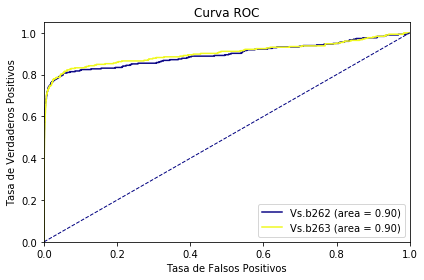

CPU times: user 9min 58s, sys: 1.59 s, total: 10min
Wall time: 10min


In [31]:
%%time
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_poly(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.95      0.55      0.70       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19988
          1       0.91      0.53      0.67       305

avg / total       0.99      0.99      0.99     20293

--------------------------------------------------------------------------------


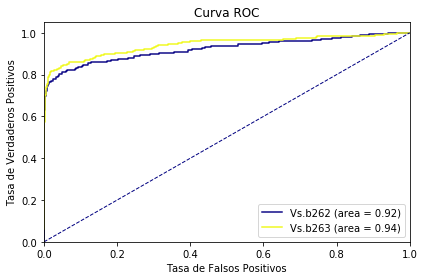

CPU times: user 9min 17s, sys: 1.31 s, total: 9min 19s
Wall time: 9min 19s


In [32]:
%%time
svc_rbf = WithAnotherExperiment(
    clf=SVC(kernel='rbf', probability=True), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(svc_rbf(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19951
          1       0.98      0.71      0.82       296

avg / total       1.00      1.00      1.00     20247

--------------------------------------------------------------------------------
b278 + b261 + b264 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19988
          1       0.94      0.71      0.81       305

avg / total       0.99      1.00      0.99     20293

--------------------------------------------------------------------------------


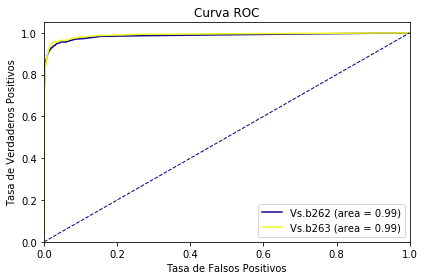

CPU times: user 13min 22s, sys: 3.9 s, total: 13min 26s
Wall time: 25.2 s


In [33]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy", n_jobs=cpu), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(rf(["b278", "b261", "b264"]))

In [ ]:
%%time
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
roc(knn(["b278", "b261", "b264"]))

b278 + b261 + b264 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     19951
          1       0.89      0.49      0.63       296

avg / total       0.99      0.99      0.99     20247

--------------------------------------------------------------------------------
